In [1]:
import os, sys
# import importlib
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv11_rerun import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [15]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1000,
                                                           debug=True,
                                                          designated_ukc_cls=5)

ablation set to : 1000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 800, val_0:, 100, test_0:, 100, train_1:, 800, val_1:, 100, test_1:, 100, train_2:, 800, val_2:, 100, test_2:, 100, train_3:, 800, val_3:, 100, test_3:, 2, 628 data in class 4 not enough to split into train:800 and validation:100, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 100
75 data in class 6 not enough to split into train:800 and validation:100, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    800
1    800
2    800
3    800
Name: label, dtype: int64
val: 0    100
1    100
2    100
3    100
Name: label, dtype: int64
test: 0    100
1    100
2    100
5    100
3      2
Name: label, dtype: int64
test df 0    100
1    100
2    100
4    100
3      2
Name: labe

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2.6
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2023-03-17 16:05:39.159242
starting to create ptmodel automatically
staring pre trining
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.8691 - precision_4: 0.9224 - recall_4: 0.8131
Epoch 1: val_accuracy improved from -inf to 0.98698, saving model to data\ptmodel_2023-03-17_16_05_39.159242\
INFO:tensorflow:Assets written to: data\ptmodel_2023-03-17_16_05_39.159242\assets
100/100 [==============================] - 12s 114ms/step - loss: 0.3153 - accuracy: 0.8691 - precision_4: 0.9224 - recall_4: 0.8131 - val_loss: 0.0316 - val_accuracy: 0.9870 - val_precision_4: 0.9870 - val_recall_4: 0.9870 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9819 - precision_4: 0.9822 - recall_4: 0.9819
Epoch 2: val_accuracy improved from 0.98698 to 

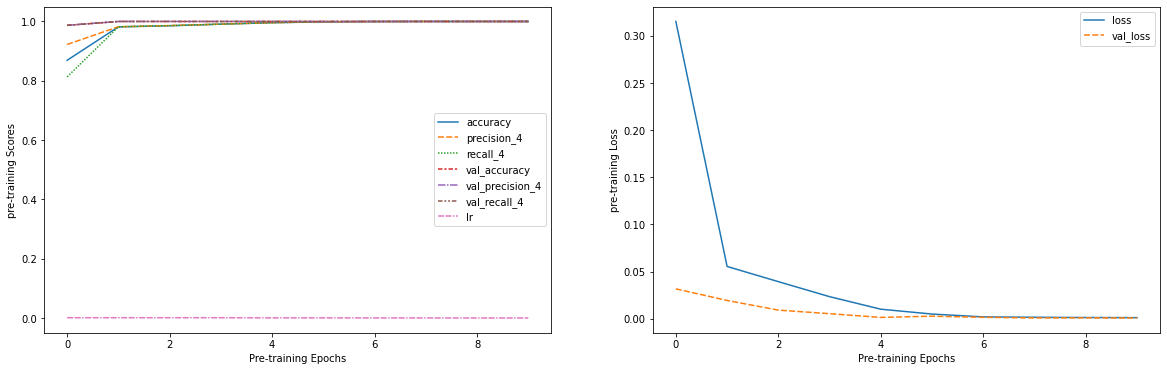

run_id:  2023-03-17_16_07_26.448723_b5a9ef41c4af11ed8209ac8247733f47
features_n_centroid: (3204, 16)
tsne_features: (3200, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


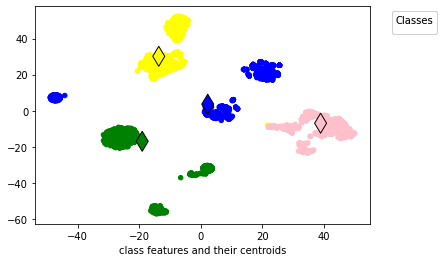

run_id:  2023-03-17_16_07_50.297904_c3e107e1c4af11edb63aac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.02it/s]


epoch: 1/9, train_loss: 3.9338812828063965, F1_train: 0.4682553990432271 F1_val: 0.5146747422138046


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.96it/s]


epoch: 2/9, train_loss: 3.9338808059692383, F1_train: 0.6353015315956895 F1_val: 0.5683871085391946


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.98it/s]


epoch: 3/9, train_loss: 3.9338791370391846, F1_train: 0.8013368744816599 F1_val: 0.5818190825751309


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.93it/s]


epoch: 4/9, train_loss: 3.9338746070861816, F1_train: 0.8358652999908383 F1_val: 0.5973958333333333


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.90it/s]


epoch: 5/9, train_loss: 3.933877944946289, F1_train: 0.8526817428469126 F1_val: 0.6086805555555556


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.02it/s]


epoch: 6/9, train_loss: 3.933872938156128, F1_train: 0.8797172688945334 F1_val: 0.6050907258064516


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.99it/s]


epoch: 7/9, train_loss: 3.9338796138763428, F1_train: 0.8904955405187286 F1_val: 0.6339567550505051


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.76it/s]


epoch: 8/9, train_loss: 3.9338769912719727, F1_train: 0.8965947032282524 F1_val: 0.6430689102564102


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.16it/s]


epoch: 9/9, train_loss: 3.9338736534118652, F1_train: 0.9016185632672282 F1_val: 0.6414023631840796


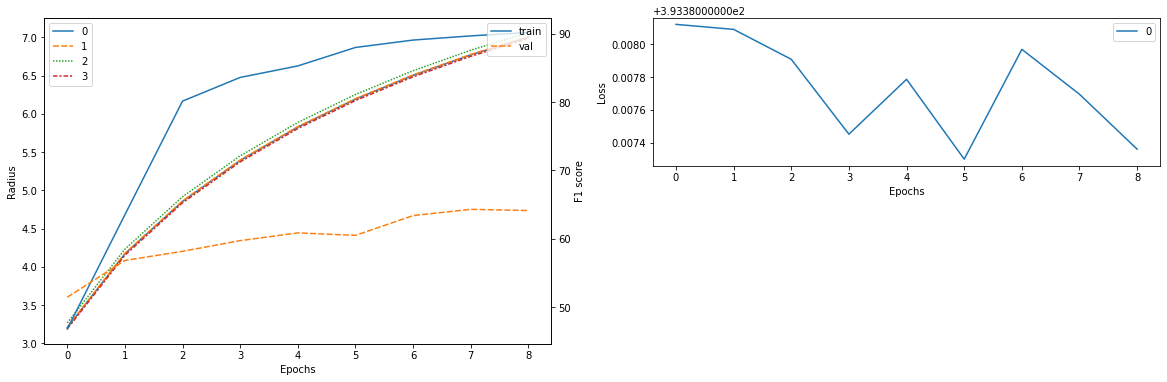

classification report for training:
[[800   0   0   0   0]
 [  0 596   0   0 204]
 [  0   0 732   0  68]
 [  0   0   0 530 270]
 [  0   0   0   0   0]]
83.06
f1_weighted: 0.9016185632672282, f1_macro: 0.7212948506137826, f1_micro: 0.830625, f_measure: {'Known': 90.1619, 'Open': 0, 'F1-score': 72.1295}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.74      0.85       800
           2       1.00      0.92      0.96       800
           3       1.00      0.66      0.80       800
           5       0.00      0.00      0.00         0

    accuracy                           0.83      3200
   macro avg       0.80      0.66      0.72      3200
weighted avg       1.00      0.83      0.90      3200

classification report for test data:
[[100   0   0   0   0]
 [  0   0   0   0  95]
 [  0   0  92   0   0]
 [  0   0   0   1   1]
 [  5   0   0   0  90]]
73.7
f1_weighted: 0.6555947954942183, f1_macro: 0.65656

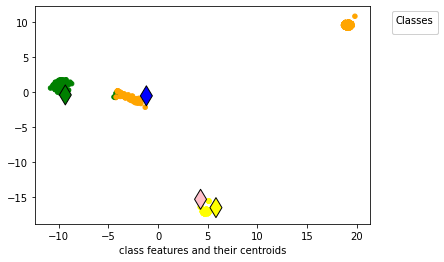

INFO:tensorflow:Assets written to: ram://aa8438c0-ec55-472e-afde-3fdda12e65a9/assets


In [ ]:
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,  
                 centroid_class_color=False,
                 tsne_n_iter=2000, tsne_perplexity=86,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

In [4]:
oset.total_features.shape

(1152, 16)

In [5]:
len(oset.total_preds)

1152

In [6]:
len(oset.total_labels)

8000

In [22]:
oset.centroids.numpy()

array([[0.0000000e+00, 4.7840900e-04, 6.1749425e+00, 4.5609741e+00,
        1.3307843e+01, 0.0000000e+00, 4.4403549e+01, 0.0000000e+00,
        0.0000000e+00, 2.2885807e+01, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.7502274e+01, 0.0000000e+00,
        2.3974918e-02, 0.0000000e+00, 9.3266876e+01, 0.0000000e+00,
        0.0000000e+00, 1.8693241e+00, 0.0000000e+00, 0.0000000e+00],
       [2.2870748e-01, 0.0000000e+00, 1.2948877e+02, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.0128098e+01, 0.0000000e+00,
        2.6683000e-04, 1.9052148e-02, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [7]:
oset.centroids.shape

TensorShape([2, 16])

In [21]:
kwargs = {}
tsne_perplexity = kwargs.get('tsne_perplexity', 86)
tsne_early_exaggeration = kwargs.get('tsne_early_exaggeration', 12)
tsne_random_state = kwargs.get('tsne_random_state', 123)
tsne_lr = kwargs.get('tsne_lr', 80)
tsne_n_iter = kwargs.get('tsne_n_iter', 1000)
tsne_n_iter_without_progress = kwargs.get('tsne_n_iter_without_progress', 300)
tsne = TSNE(perplexity=tsne_perplexity, early_exaggeration=tsne_early_exaggeration, 
                    random_state=tsne_random_state, learning_rate=tsne_lr, n_iter=tsne_n_iter,
                   n_iter_without_progress=tsne_n_iter_without_progress)

In [22]:
features = np.array(oset.total_features)
print('features:', features.shape)
centroids = oset.centroids.numpy()
labels = np.array(oset.total_preds)
print('labels:', labels.shape)
features_n_centroid = np.concatenate([features, centroids], axis=0)
print('features_n_centroid:', features_n_centroid.shape)
tout = tsne.fit_transform(features_n_centroid)
tsne_features = tout[:features.shape[0]]
tsne_centroids = tout[features.shape[0]:]
print('tsne_features:', tsne_features.shape)
print('tsne_centroids:', tsne_centroids.shape)

fixed_color_maps = np.array(["green","blue","yellow","pink","black","orange","purple",
                                     "beige","brown","gray","cyan","magenta", "red",])


features: (384, 16)
labels: (384,)
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)


In [24]:
fixed_color_maps = np.array(["green","blue","yellow","pink","black","orange","purple",
                                     "beige","brown","gray","cyan","magenta", "red",])
filtered_fixed_color_map = list(fixed_color_maps)
filtered_fixed_color_map = filtered_fixed_color_map[:np.unique(labels)[-1]]
print('filtered_fixed_color_map', filtered_fixed_color_map)
filtered_fixed_color_map.append("red")
filtered_fixed_color_map = np.array(filtered_fixed_color_map)
print('filtered_fixed_color_map', filtered_fixed_color_map)
# class_num_substitute = oset.num_classes + 1
# np.unique(labels)
# np.unique(filtered_fixed_color_map[labels])
centroid_classes = np.array([i for i in  range(len(centroids))])
centriod_class_colors = filtered_fixed_color_map[centroid_classes]
print(centriod_class_colors)
centriod_class_colors = filtered_fixed_color_map[:oset.num_classes]
print(centriod_class_colors)

filtered_fixed_color_map ['green', 'blue', 'yellow', 'pink', 'black']
filtered_fixed_color_map ['green' 'blue' 'yellow' 'pink' 'black' 'red']
['green' 'blue' 'yellow' 'pink']
['green' 'blue' 'yellow' 'pink']


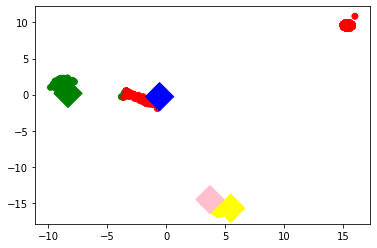

In [25]:
import matplotlib.pyplot as plt
clist=['cyan', 'blue', 'magenta', 'red']
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap=plt.colormaps['coolwarm'], 
            c=filtered_fixed_color_map[labels]
            # c=clist[labels]
           )
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='D', 
            c=centriod_class_colors,
           cmap=plt.colormaps['plasma'],
            s=400
           )

In [11]:
oset.num_classes

2

In [12]:
clist[:oset.num_classes]

['cyan', 'blue']

features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


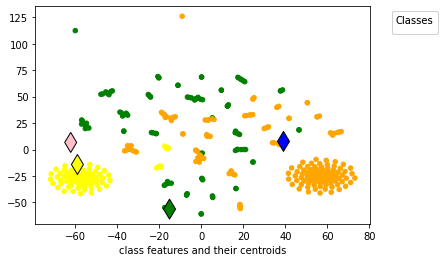

In [26]:
oset.plot_centroids(use_labels=oset.total_preds, tsne_perplexity=1,
                   manual_color_map=True, centroid_black=False,  )

perpexity : 13
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


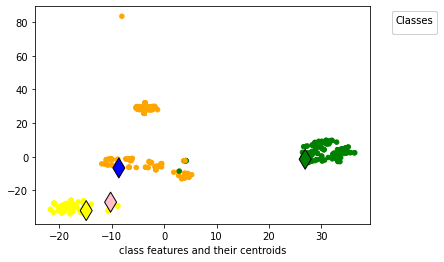

perpexity : 17
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


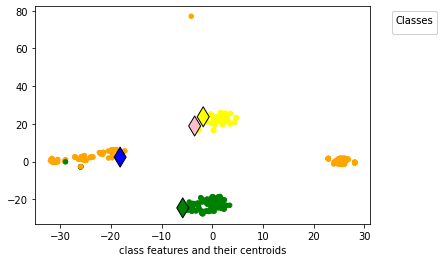

perpexity : 30
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


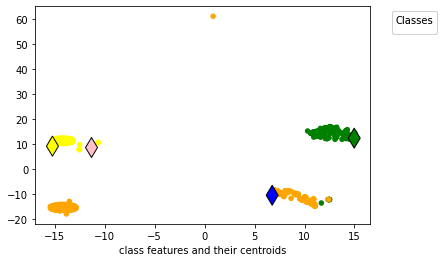

perpexity : 40
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


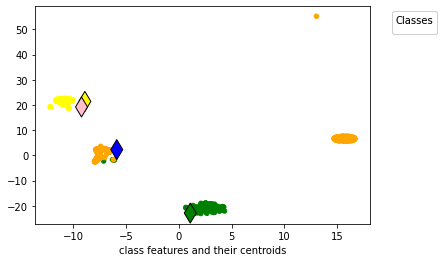

perpexity : 45
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


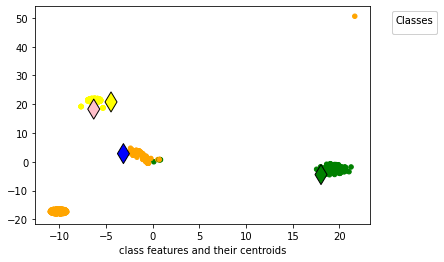

perpexity : 86
features_n_centroid: (388, 16)
tsne_features: (384, 2)
tsne_centroids: (4, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'pink' 'red']


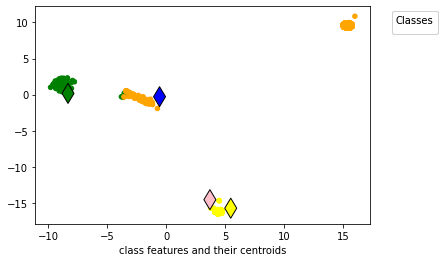

In [27]:
for i in (13, 17, 30, 40, 45, 86):
    print('perpexity :', i)    
    oset.plot_centroids(use_labels=oset.total_preds, centroid_black=False,
                        manual_color_map=True, tsne_perplexity=i)

In [15]:
oset.radius

<tf.Variable 'boundary_loss/Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[7.2215953],
       [7.225646 ]], dtype=float32)>

ablation set to : 1500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, 902 data in class 3 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 150
75 data in class 6 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    1200
1    1200
2    1200
Name: label, dtype: int64
val: 0    150
1    150
2    150
Name: label, dtype: int64
test: 0    150
1    150
2    1

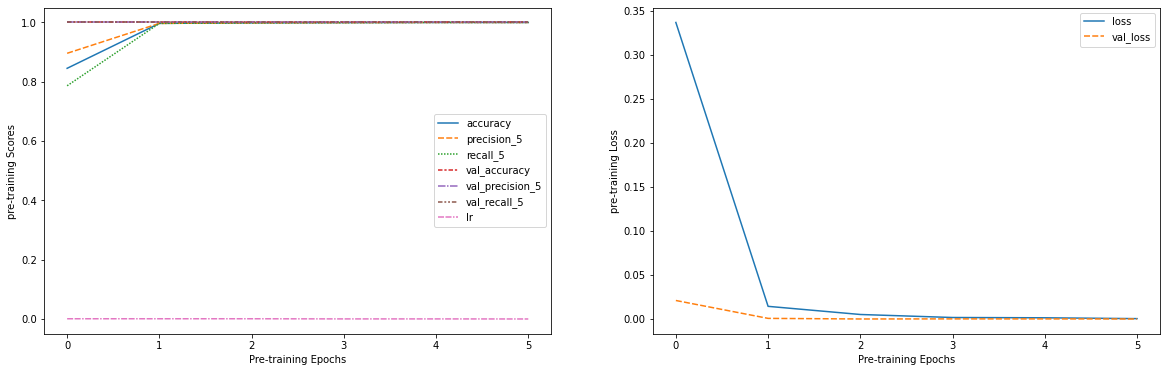

run_id:  2023-03-17_16_21_42.590624_b3f6d240c4b111edbf79ac8247733f47
features_n_centroid: (3587, 12)
tsne_features: (3584, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


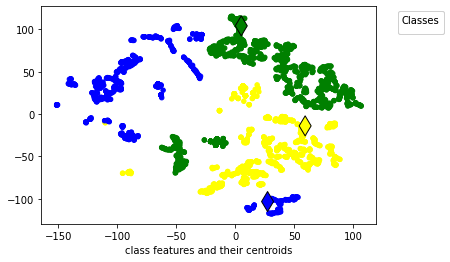

run_id:  2023-03-17_16_22_01.964416_bf830701c4b111ed9faaac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.16it/s]


epoch: 1/10, train_loss: 21.18422508239746, F1_train: 0.29597519868534955 F1_val: 0.3262296365914787


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:16<00:00,  6.95it/s]


epoch: 2/10, train_loss: 21.204294204711914, F1_train: 0.3529935918189797 F1_val: 0.36487895918235924


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.16it/s]


epoch: 3/10, train_loss: 21.179765701293945, F1_train: 0.3835067752588223 F1_val: 0.38328015152549316


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.08it/s]


epoch: 4/10, train_loss: 21.189477920532227, F1_train: 0.4115518334991735 F1_val: 0.4158022161784704


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.09it/s]


epoch: 5/10, train_loss: 21.21527099609375, F1_train: 0.4260592223161969 F1_val: 0.4204971195578132


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.14it/s]


epoch: 6/10, train_loss: 21.195327758789062, F1_train: 0.4331157489221234 F1_val: 0.42374856464451843


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.04it/s]


epoch: 7/10, train_loss: 21.22696876525879, F1_train: 0.4467271291906324 F1_val: 0.425980732637556


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.03it/s]


epoch: 8/10, train_loss: 21.18912124633789, F1_train: 0.45423371631039294 F1_val: 0.4315137987012987


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.21it/s]


epoch: 9/10, train_loss: 21.204605102539062, F1_train: 0.460986527075956 F1_val: 0.4325060532687651


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.05it/s]


epoch: 10/10, train_loss: 21.16193962097168, F1_train: 0.4716037585252751 F1_val: 0.43781527441485074


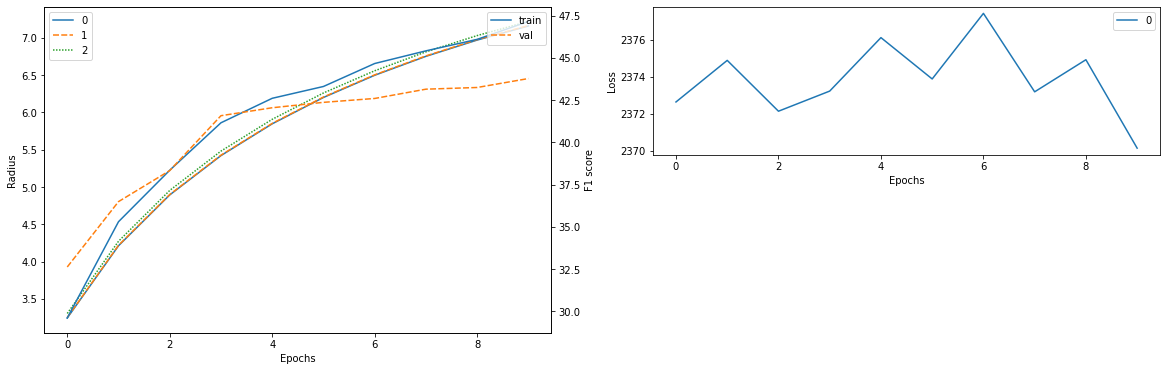

classification report for training:
[[ 885    0    0  309]
 [   0   85    0 1108]
 [   0    0  331  866]
 [   0    0    0    0]]
36.3
f1_weighted: 0.4726075940319589, f1_macro: 0.3544093172393077, f1_micro: 0.3630022321428571, f_measure: {'Known': 47.2546, 'Open': 0, 'F1-score': 35.4409}
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1194
           1       1.00      0.07      0.13      1193
           2       1.00      0.28      0.43      1197
           5       0.00      0.00      0.00         0

    accuracy                           0.36      3584
   macro avg       0.75      0.27      0.35      3584
weighted avg       1.00      0.36      0.47      3584

classification report for test data:
[[143   0   0   0]
 [  0   0   0 149]
 [  0   0  85  58]
 [  0   0   0 141]]
64.06
f1_weighted: 0.5745411292589004, f1_macro: 0.5805752879130341, f1_micro: 0.640625, f_measure: {'Known': 58.1871, 'Open': 57.6687, 'F1-score': 58.0575}
     

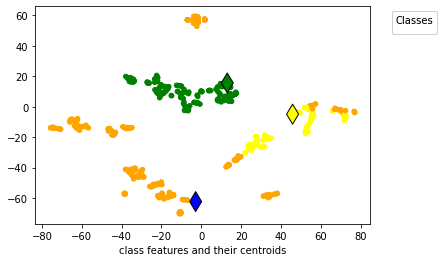

INFO:tensorflow:Assets written to: ram://13568f3f-58f2-4405-bfd6-2de7af48977e/assets


In [28]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

ablation set to : 2000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1600, val_0:, 200, test_0:, 200, train_1:, 1600, val_1:, 200, test_1:, 200, train_2:, 1600, val_2:, 200, test_2:, 200, 902 data in class 3 not enough to split into train:1600 and validation:200, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:1600 and validation:200, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:1600 and validation:200, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    1600
1    1600
2    1600
Name: label, dtype: int64
val: 0    200
1    200
2    200
Name: label, dtype: int64
test: 0    200
1    200
2    2

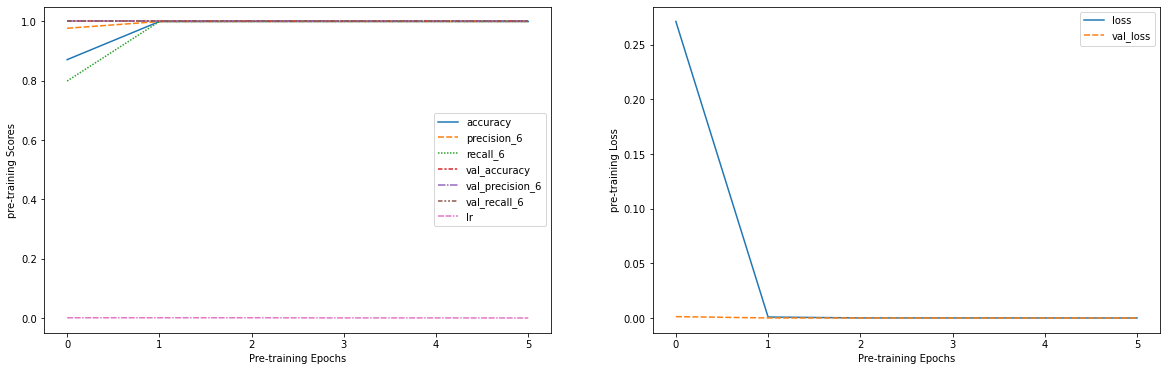

run_id:  2023-03-17_16_31_55.219341_211e8b83c4b311edac6dac8247733f47
features_n_centroid: (4803, 12)
tsne_features: (4800, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


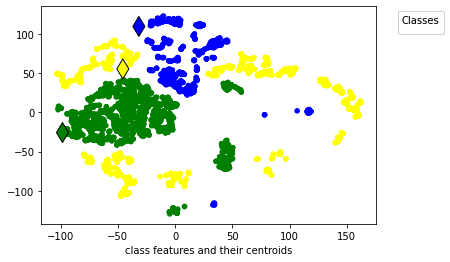

run_id:  2023-03-17_16_32_21.695644_30e68219c4b311eda8a5ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:21<00:00,  6.97it/s]


epoch: 1/10, train_loss: 4.092333793640137, F1_train: 0.5065897572529975 F1_val: 0.5790424098848013


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:20<00:00,  7.19it/s]


epoch: 2/10, train_loss: 4.092267036437988, F1_train: 0.6247263482158242 F1_val: 0.6299660852713179


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:20<00:00,  7.31it/s]


epoch: 3/10, train_loss: 4.092249393463135, F1_train: 0.647141929794873 F1_val: 0.6514116575591985


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:21<00:00,  6.95it/s]


epoch: 4/10, train_loss: 4.092160224914551, F1_train: 0.6636885719451321 F1_val: 0.6527965974104186


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:21<00:00,  7.06it/s]


epoch: 5/10, train_loss: 4.092134475708008, F1_train: 0.6720983337129155 F1_val: 0.6504345021250759


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:22<00:00,  6.69it/s]


epoch: 6/10, train_loss: 4.092228412628174, F1_train: 0.6794671920485083 F1_val: 0.6549865229110512


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:21<00:00,  7.09it/s]


epoch: 7/10, train_loss: 4.092247486114502, F1_train: 0.6806843394508356 F1_val: 0.6506944444444444


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:22<00:00,  6.58it/s]


epoch: 8/10, train_loss: 4.092291831970215, F1_train: 0.6848158488292175 F1_val: 0.6603997289972899


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:20<00:00,  7.20it/s]


epoch: 9/10, train_loss: 4.092312812805176, F1_train: 0.6858070106236906 F1_val: 0.6613121345029239


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:21<00:00,  7.01it/s]


epoch: 10/10, train_loss: 4.092232704162598, F1_train: 0.687570208703274 F1_val: 0.6665848603839442


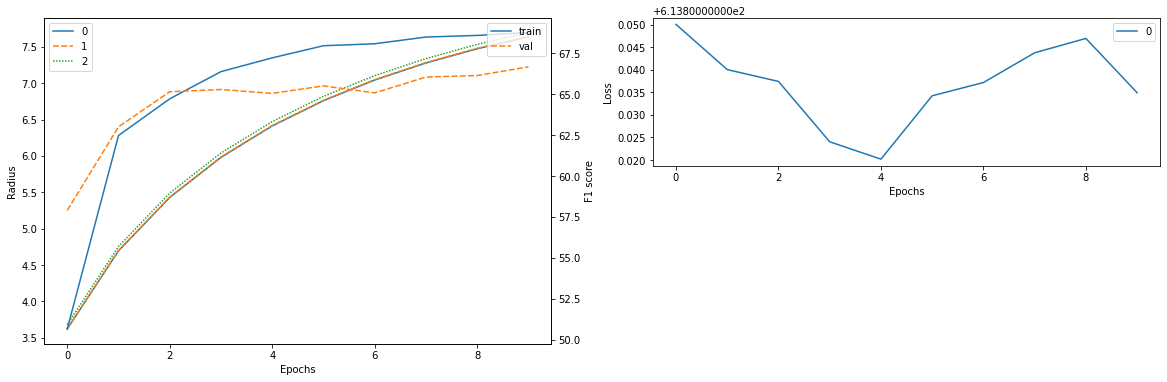

classification report for training:
[[1600    0    0    0]
 [   0   61    0 1539]
 [   0    0 1566   34]
 [   0    0    0    0]]
67.23
f1_weighted: 0.687570208703274, f1_macro: 0.5156776565274555, f1_micro: 0.6722916666666666, f_measure: {'Known': 68.757, 'Open': 0, 'F1-score': 51.5678}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      0.04      0.07      1600
           2       1.00      0.98      0.99      1600
           5       0.00      0.00      0.00         0

    accuracy                           0.67      4800
   macro avg       0.75      0.50      0.52      4800
weighted avg       1.00      0.67      0.69      4800

classification report for test data:
[[192   0   0   0]
 [  0   0   0 194]
 [  0   0 193   0]
 [  0   0   0 157]]
73.64
f1_weighted: 0.654950145498117, f1_macro: 0.6545275590551181, f1_micro: 0.736413043478261, f_measure: {'Known': 66.6667, 'Open': 61.811, 'F1-score': 65.4528}

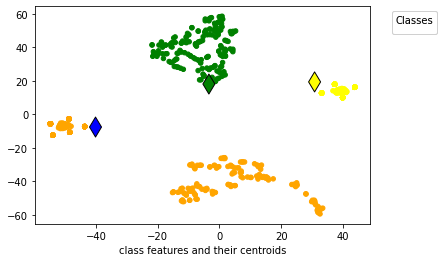

INFO:tensorflow:Assets written to: ram://83fcbd29-0f1c-401f-a620-884dd31c37cf/assets


In [29]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=2000,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

ablation set to : 2500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 2000, val_0:, 250, test_0:, 250, train_1:, 2000, val_1:, 250, test_1:, 250, train_2:, 2000, val_2:, 250, test_2:, 250, 902 data in class 3 not enough to split into train:2000 and validation:250, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:2000 and validation:250, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2000 and validation:250, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    2000
1    2000
2    2000
Name: label, dtype: int64
val: 0    250
1    250
2    250
Name: label, dtype: int64
test: 0    250
1    250
2    2

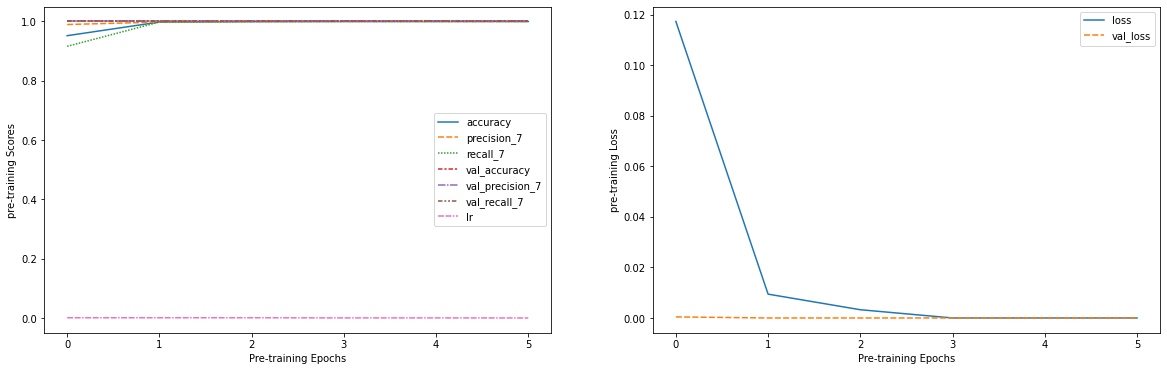

run_id:  2023-03-17_16_48_06.501279_640c6838c4b511ed98e9ac8247733f47
features_n_centroid: (5987, 12)
tsne_features: (5984, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


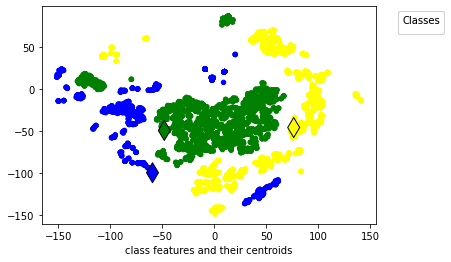

run_id:  2023-03-17_16_48_38.441080_771608b8c4b511ed9795ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:24<00:00,  7.49it/s]


epoch: 1/10, train_loss: 6.602488040924072, F1_train: 0.6133457610990469 F1_val: 0.6657608695652174


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:24<00:00,  7.49it/s]


epoch: 2/10, train_loss: 6.593813896179199, F1_train: 0.6246630271630502 F1_val: 0.6657608695652174


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:25<00:00,  7.48it/s]


epoch: 3/10, train_loss: 6.5974297523498535, F1_train: 0.6334858781035392 F1_val: 0.6711956521739131


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:25<00:00,  7.32it/s]


epoch: 4/10, train_loss: 6.595625877380371, F1_train: 0.6455151122861466 F1_val: 0.6684782608695652


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:26<00:00,  7.11it/s]


epoch: 5/10, train_loss: 6.594328880310059, F1_train: 0.6540822386044512 F1_val: 0.6684782608695652


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:29<00:00,  6.28it/s]


epoch: 6/10, train_loss: 6.5999274253845215, F1_train: 0.6598671345262388 F1_val: 0.6644021739130435


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:28<00:00,  6.58it/s]


epoch: 7/10, train_loss: 6.59574031829834, F1_train: 0.6628245948627887 F1_val: 0.6644021739130435


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:30<00:00,  6.10it/s]


epoch: 8/10, train_loss: 6.595561981201172, F1_train: 0.6641010256393252 F1_val: 0.6684782608695652


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:28<00:00,  6.48it/s]


epoch: 9/10, train_loss: 6.602800369262695, F1_train: 0.6647791902566762 F1_val: 0.6684782608695652


100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:27<00:00,  6.81it/s]


epoch: 10/10, train_loss: 6.600715160369873, F1_train: 0.6657853248279219 F1_val: 0.6698369565217391


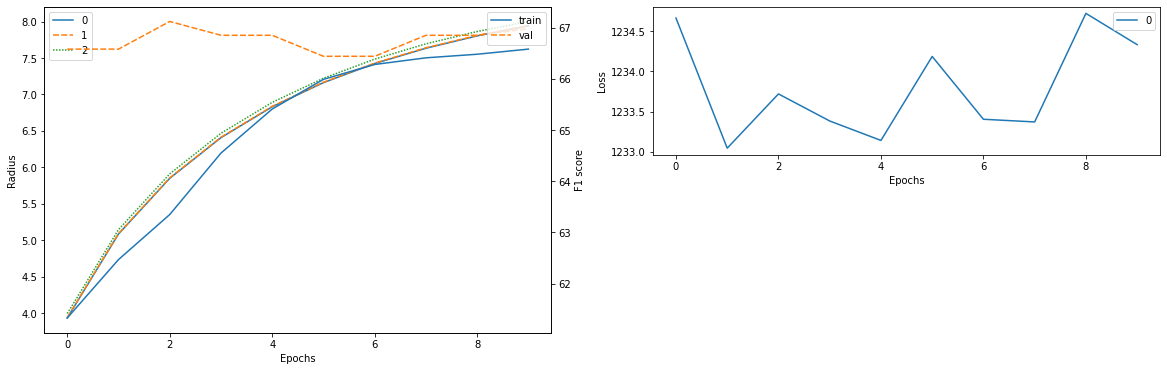

classification report for training:
[[1988    0    0    5]
 [   0   11    0 1983]
 [   0    0 1947   50]
 [   0    0    0    0]]
65.94
f1_weighted: 0.6657852982472203, f1_macro: 0.49925977948845157, f1_micro: 0.6594251336898396, f_measure: {'Known': 66.568, 'Open': 0, 'F1-score': 49.926}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      0.01      0.01      1994
           2       1.00      0.97      0.99      1997
           5       0.00      0.00      0.00         0

    accuracy                           0.66      5984
   macro avg       0.75      0.49      0.50      5984
weighted avg       1.00      0.66      0.67      5984

classification report for test data:
[[246   0   0   0]
 [  0   6   0 237]
 [  0   0 237   9]
 [  0   0   0 161]]
72.54
f1_weighted: 0.6589264723240851, f1_macro: 0.6491151597905926, f1_micro: 0.7254464285714286, f_measure: {'Known': 67.652, 'Open': 56.6901, 'F1-score': 64.91

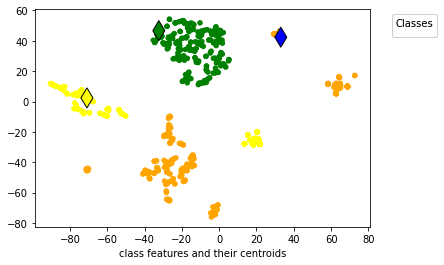

INFO:tensorflow:Assets written to: ram://01f58b77-6cde-43b3-a4ec-19ed0b95a380/assets


In [30]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=2500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

ablation set to : 3500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 2800, val_0:, 350, test_0:, 350, train_1:, 2800, val_1:, 350, test_1:, 350, train_2:, 2800, val_2:, 350, test_2:, 350, 902 data in class 3 not enough to split into train:2800 and validation:350, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:2800 and validation:350, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2800 and validation:350, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    2800
1    2800
2    2800
Name: label, dtype: int64
val: 0    350
1    350
2    350
Name: label, dtype: int64
test: 0    350
1    350
2    3

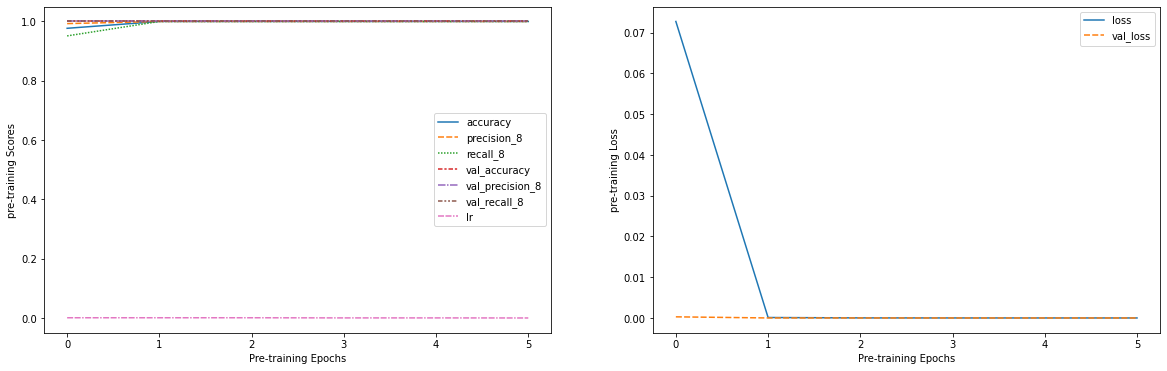

run_id:  2023-03-17_17_00_34.845653_2218b255c4b711edb92eac8247733f47
features_n_centroid: (8387, 12)
tsne_features: (8384, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


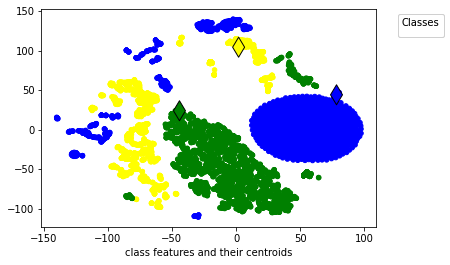

run_id:  2023-03-17_17_01_23.379456_3f065e08c4b711eda47dac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:37<00:00,  6.99it/s]


epoch: 1/10, train_loss: 6.423144817352295, F1_train: 0.623846747512037 F1_val: 0.6669921875


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.20it/s]


epoch: 2/10, train_loss: 6.4137396812438965, F1_train: 0.6284875936269575 F1_val: 0.6689453125


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:37<00:00,  6.90it/s]


epoch: 3/10, train_loss: 6.420588493347168, F1_train: 0.6314434000580347 F1_val: 0.6669921875


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:38<00:00,  6.86it/s]


epoch: 4/10, train_loss: 6.410850524902344, F1_train: 0.6345766996171873 F1_val: 0.6640625


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.25it/s]


epoch: 5/10, train_loss: 6.422863483428955, F1_train: 0.6389116163675186 F1_val: 0.66796875


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:37<00:00,  6.92it/s]


epoch: 6/10, train_loss: 6.4206647872924805, F1_train: 0.6418821423327576 F1_val: 0.6640625


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:37<00:00,  7.08it/s]


epoch: 7/10, train_loss: 6.409584999084473, F1_train: 0.6447429336872126 F1_val: 0.6640625


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:38<00:00,  6.88it/s]


epoch: 8/10, train_loss: 6.419892311096191, F1_train: 0.6470642542803975 F1_val: 0.66796875


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.21it/s]


epoch: 9/10, train_loss: 6.421706676483154, F1_train: 0.6490502880365963 F1_val: 0.6728515625


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.22it/s]


epoch: 10/10, train_loss: 6.424104690551758, F1_train: 0.6502982903657176 F1_val: 0.6689453125


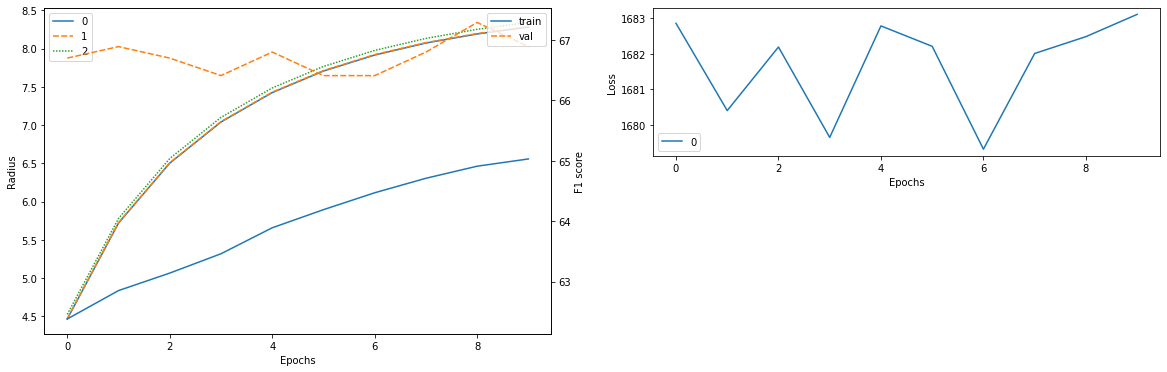

classification report for training:
[[2768    0    0   27]
 [   0    2    0 2792]
 [   0    0 2556  239]
 [   0    0    0    0]]
63.53
f1_weighted: 0.6507149574191151, f1_macro: 0.48797814254177335, f1_micro: 0.6352576335877863, f_measure: {'Known': 65.0638, 'Open': 0, 'F1-score': 48.7978}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2795
           1       1.00      0.00      0.00      2794
           2       1.00      0.91      0.96      2795
           5       0.00      0.00      0.00         0

    accuracy                           0.64      8384
   macro avg       0.75      0.48      0.49      8384
weighted avg       1.00      0.64      0.65      8384

classification report for test data:
[[318   0   0  23]
 [  0   0   0 340]
 [  0   0 322  19]
 [  0   0   0 162]]
67.74
f1_weighted: 0.6204999966208266, f1_macro: 0.5988411325373374, f1_micro: 0.6773648648648649, f_measure: {'Known': 64.548, 'Open': 45.8924, 'F1-score': 59.

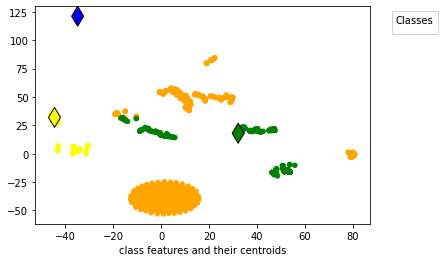

INFO:tensorflow:Assets written to: ram://58be9544-ef67-42f2-9e35-c97b9867e6e7/assets


In [31]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=3500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

ablation set to : 3500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 2800, val_0:, 350, test_0:, 350, train_1:, 2800, val_1:, 350, test_1:, 350, train_2:, 2800, val_2:, 350, test_2:, 350, 902 data in class 3 not enough to split into train:2800 and validation:350, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:2800 and validation:350, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2800 and validation:350, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    2800
1    2800
2    2800
Name: label, dtype: int64
val: 0    350
1    350
2    350
Name: label, dtype: int64
test: 0    350
1    350
2    3

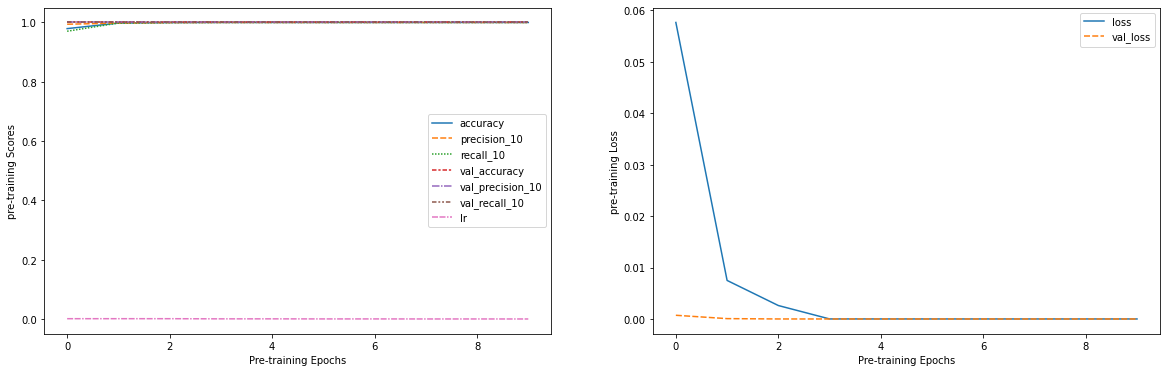

run_id:  2023-03-17_17_32_11.029436_8c4f6158c4bb11ed95f4ac8247733f47
features_n_centroid: (8387, 16)
tsne_features: (8384, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


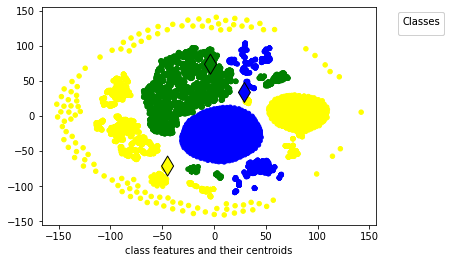

run_id:  2023-03-17_17_33_01.896870_aaa1227cc4bb11edb3eeac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.18it/s]


epoch: 1/9, train_loss: 3.790071487426758, F1_train: 0.6232095639612117 F1_val: 0.6728515625


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.17it/s]


epoch: 2/9, train_loss: 3.783978223800659, F1_train: 0.9408512716499899 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:37<00:00,  7.07it/s]


epoch: 3/9, train_loss: 3.7923357486724854, F1_train: 0.9481304176194367 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:38<00:00,  6.75it/s]


epoch: 4/9, train_loss: 3.790194511413574, F1_train: 0.9497392657604866 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:39<00:00,  6.71it/s]


epoch: 5/9, train_loss: 3.7849185466766357, F1_train: 0.9504863330919587 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.26it/s]


epoch: 6/9, train_loss: 3.789874315261841, F1_train: 0.951173229597292 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.27it/s]


epoch: 7/9, train_loss: 3.7918004989624023, F1_train: 0.9515091758204577 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:36<00:00,  7.27it/s]


epoch: 8/9, train_loss: 3.7929604053497314, F1_train: 0.9518281149095053 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:38<00:00,  6.88it/s]


epoch: 9/9, train_loss: 3.787797689437866, F1_train: 0.9519852870475207 F1_val: 1.0


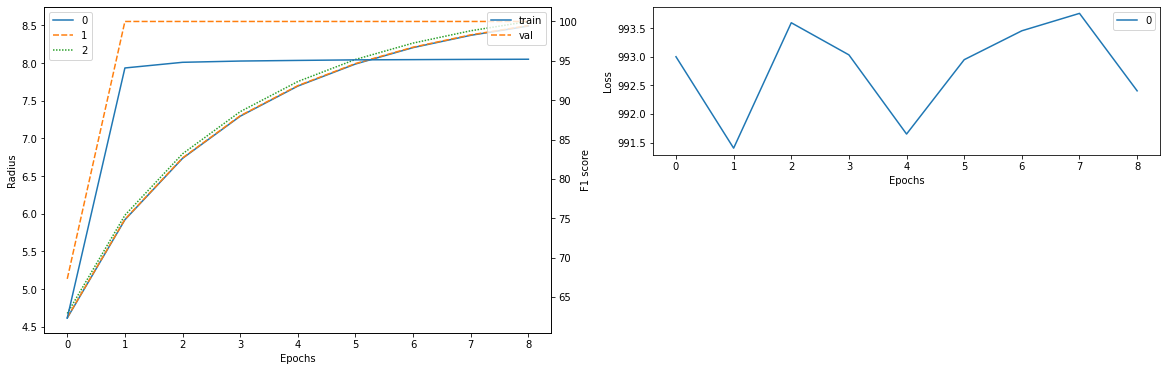

classification report for training:
[[2794    0    0    2]
 [   0 2141    0  656]
 [   0    0 2733   58]
 [   0    0    0    0]]
91.46
f1_weighted: 0.9520659871365069, f1_macro: 0.7140738184253718, f1_micro: 0.9145992366412213, f_measure: {'Known': 95.2098, 'Open': 0, 'F1-score': 71.4074}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2796
           1       1.00      0.77      0.87      2797
           2       1.00      0.98      0.99      2791
           5       0.00      0.00      0.00         0

    accuracy                           0.91      8384
   macro avg       0.75      0.69      0.71      8384
weighted avg       1.00      0.91      0.95      8384

classification report for test data:
[[326   0   0  15]
 [  0 340   0   0]
 [  0   0 336   5]
 [  0   0   0 162]]
98.31
f1_weighted: 0.9834411029313685, f1_macro: 0.977996546280465, f1_micro: 0.9831081081081081, f_measure: {'Known': 99.0042, 'Open': 94.186, 'F1-score': 97.79

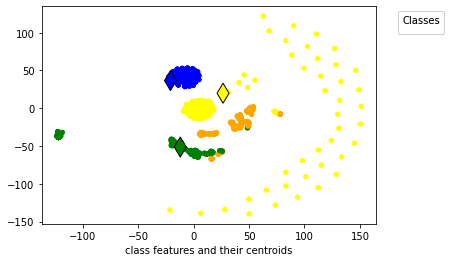

INFO:tensorflow:Assets written to: ram://56d936ac-c68a-4679-9e5d-13a3ca56b779/assets


In [33]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=3500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

ablation set to : 4000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 3200, val_0:, 400, test_0:, 400, train_1:, 3200, val_1:, 400, test_1:, 400, train_2:, 3200, val_2:, 400, test_2:, 400, 902 data in class 3 not enough to split into train:3200 and validation:400, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:3200 and validation:400, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:3200 and validation:400, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    3200
1    3200
2    3200
Name: label, dtype: int64
val: 0    400
1    400
2    400
Name: label, dtype: int64
test: 0    400
1    400
2    4

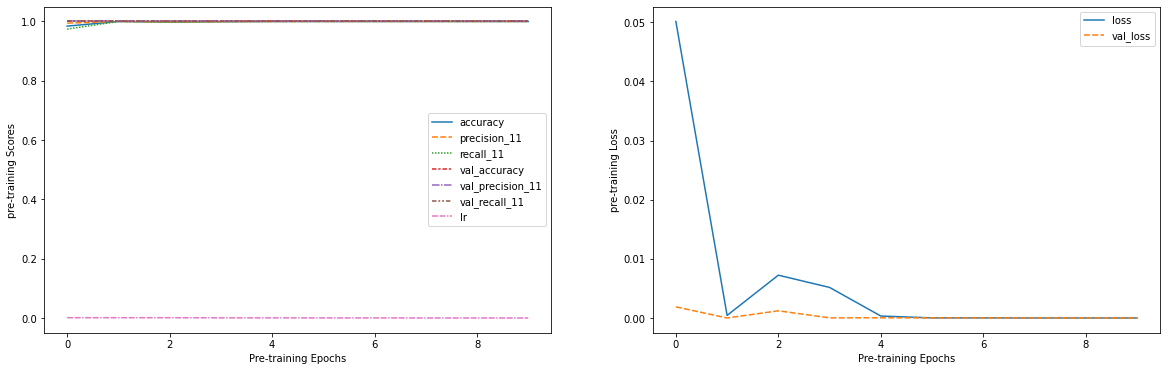

run_id:  2023-03-17_17_47_10.497148_a46f42dcc4bd11ed94c7ac8247733f47
features_n_centroid: (9603, 16)
tsne_features: (9600, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


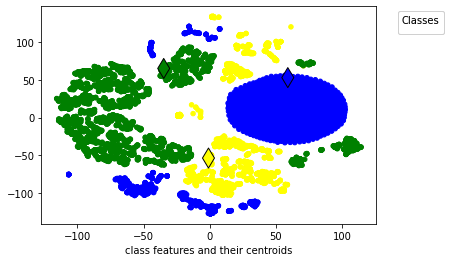

run_id:  2023-03-17_17_48_07.144525_c632f703c4bd11ed8f87ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:42<00:00,  7.11it/s]


epoch: 1/9, train_loss: 6.554722785949707, F1_train: 0.6090417632032317 F1_val: 0.6417906814929982


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.15it/s]


epoch: 2/9, train_loss: 6.554677963256836, F1_train: 0.6210469526577689 F1_val: 0.643561697932266


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:42<00:00,  7.11it/s]


epoch: 3/9, train_loss: 6.554703235626221, F1_train: 0.6262954367141084 F1_val: 0.6459050494346439


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.95it/s]


epoch: 4/9, train_loss: 6.5547285079956055, F1_train: 0.63097062586806 F1_val: 0.6502465054751047


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:42<00:00,  7.02it/s]


epoch: 5/9, train_loss: 6.554596424102783, F1_train: 0.6337592095916439 F1_val: 0.6490527067177466


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.93it/s]


epoch: 6/9, train_loss: 6.55465841293335, F1_train: 0.6354504608743408 F1_val: 0.6473592969448315


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.96it/s]


epoch: 7/9, train_loss: 6.55474853515625, F1_train: 0.9303057294611324 F1_val: 0.9831138124314062


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.90it/s]


epoch: 8/9, train_loss: 6.554628372192383, F1_train: 0.9308596400177328 F1_val: 0.9826676888201594


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:42<00:00,  6.99it/s]


epoch: 9/9, train_loss: 6.554677486419678, F1_train: 0.9312892908178941 F1_val: 0.9835551816484019


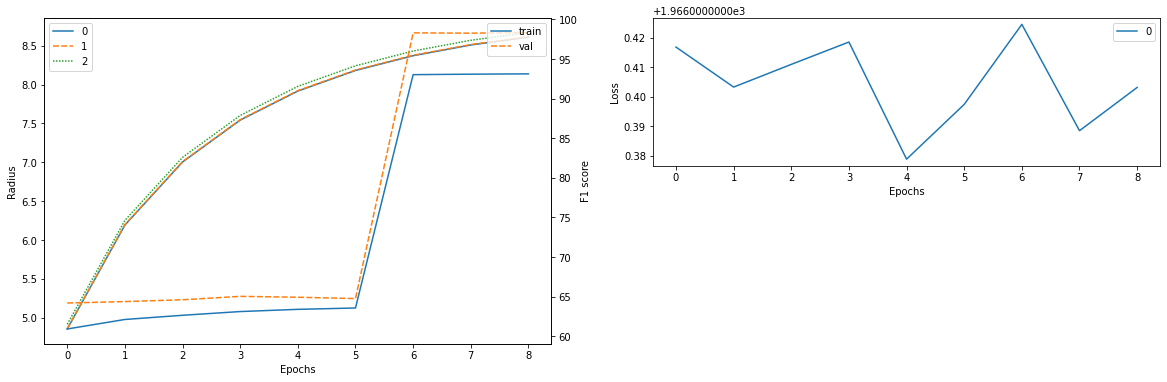

classification report for training:
[[3174    0    0   26]
 [   0 2529    0  671]
 [   0    0 2699  501]
 [   0    0    0    0]]
87.52
f1_weighted: 0.9312892908178941, f1_macro: 0.6984669681134206, f1_micro: 0.8752083333333334, f_measure: {'Known': 93.1289, 'Open': 0, 'F1-score': 69.8467}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3200
           1       1.00      0.79      0.88      3200
           2       1.00      0.84      0.92      3200
           5       0.00      0.00      0.00         0

    accuracy                           0.88      9600
   macro avg       0.75      0.66      0.70      9600
weighted avg       1.00      0.88      0.93      9600

classification report for test data:
[[390   0   0   9]
 [  0 392   0   0]
 [  0   0 350  40]
 [  0   0   0 163]]
96.35
f1_weighted: 0.9650810427483433, f1_macro: 0.9509681087932038, f1_micro: 0.9635416666666666, f_measure: {'Known': 97.818, 'Open': 86.9333, 'F1-score': 95.0

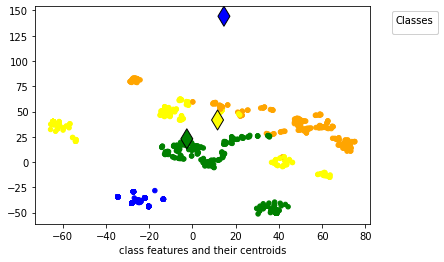

INFO:tensorflow:Assets written to: ram://189cdde7-ec91-43bd-8dac-633343293c43/assets


In [34]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=4000,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

ablation set to : 4500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 3600, val_0:, 450, test_0:, 450, train_1:, 3600, val_1:, 450, test_1:, 450, 4049 data in class 2 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
902 data in class 3 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    3600
1    3600
Name: 

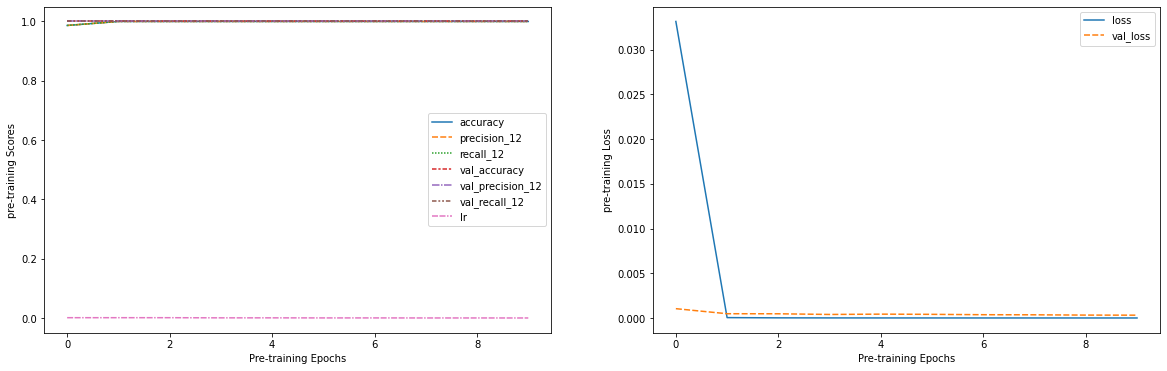

run_id:  2023-03-17_18_04_04.795236_0100ddedc4c011ed9da8ac8247733f47
features_n_centroid: (7202, 16)
tsne_features: (7200, 2)
tsne_centroids: (2, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


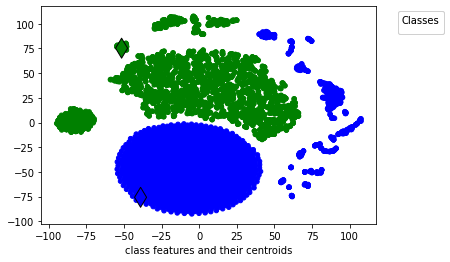

run_id:  2023-03-17_18_04_48.681994_1b297464c4c011eda043ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.99it/s]


epoch: 1/9, train_loss: 5.510079860687256, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.92it/s]


epoch: 2/9, train_loss: 5.510087490081787, F1_train: 0.49972206781545303 F1_val: 0.4880510204081633


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.96it/s]


epoch: 3/9, train_loss: 5.510083198547363, F1_train: 0.4998610725201445 F1_val: 0.4880510204081633


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.90it/s]


epoch: 4/9, train_loss: 5.510087490081787, F1_train: 0.44547134935304994 F1_val: 0.3077842537477954
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  7.00it/s]


epoch: 5/9, train_loss: 5.510073184967041, F1_train: 0.948698315467075 F1_val: 0.9903303368736825


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.12it/s]


epoch: 6/9, train_loss: 5.510084629058838, F1_train: 0.9487827285254938 F1_val: 0.9920640519187359


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  7.02it/s]


epoch: 7/9, train_loss: 5.510078430175781, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.95it/s]


epoch: 8/9, train_loss: 5.510096073150635, F1_train: 0.9487827285254938 F1_val: 0.9920632102272727
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.15it/s]


epoch: 9/9, train_loss: 5.5100998878479, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 3
val score not improving  going to wait state 3


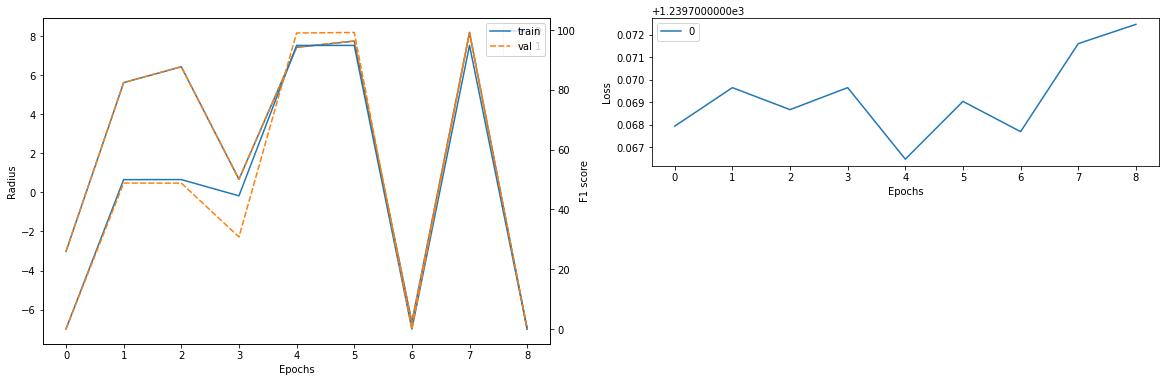

classification report for training:
[[3600    0    0]
 [   0 2931  669]
 [   0    0    0]]
90.71
f1_weighted: 0.9487827285254938, f1_macro: 0.6325218190169959, f1_micro: 0.9070833333333334, f_measure: {'Known': 94.8783, 'Open': 0, 'F1-score': 63.2522}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      0.81      0.90      3600
           5       0.00      0.00      0.00         0

    accuracy                           0.91      7200
   macro avg       0.67      0.60      0.63      7200
weighted avg       1.00      0.91      0.95      7200

classification report for test data:
[[417   0  28]
 [  0 448   0]
 [  0   0 163]]
97.35
f1_weighted: 0.9741028297843353, f1_macro: 0.9628071187314572, f1_micro: 0.9734848484848485, f_measure: {'Known': 98.3759, 'Open': 92.0904, 'F1-score': 96.2807}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       445
        

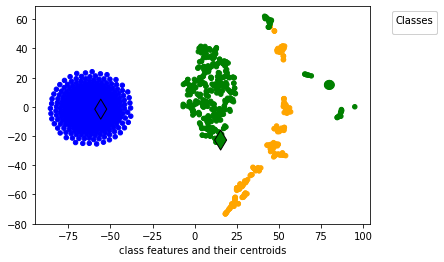

INFO:tensorflow:Assets written to: ram://9ddfe140-8b7b-4669-8da6-9e7c20780852/assets


In [35]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=4500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

ablation set to : 4500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 3600, val_0:, 450, test_0:, 450, train_1:, 3600, val_1:, 450, test_1:, 450, 4049 data in class 2 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
902 data in class 3 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:3600 and validation:450, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    3600
1    3600
Name: 

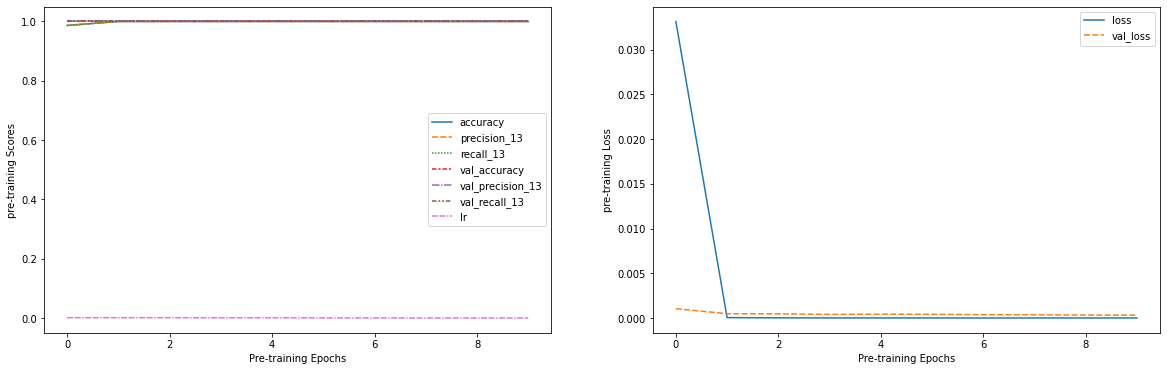

run_id:  2023-03-17_18_17_11.446557_d5e2552ac4c111ed9360ac8247733f47
features_n_centroid: (7202, 16)
tsne_features: (7200, 2)
tsne_centroids: (2, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


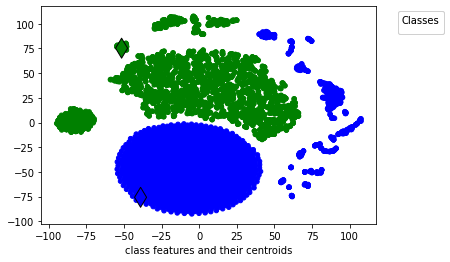

run_id:  2023-03-17_18_17_55.384543_f012bcb7c4c111ed9ffdac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.94it/s]


epoch: 1/9, train_loss: 5.510079860687256, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.97it/s]


epoch: 2/9, train_loss: 5.510087490081787, F1_train: 0.49972206781545303 F1_val: 0.4880510204081633


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.98it/s]


epoch: 3/9, train_loss: 5.510083198547363, F1_train: 0.4998610725201445 F1_val: 0.4880510204081633


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:33<00:00,  6.81it/s]


epoch: 4/9, train_loss: 5.510087490081787, F1_train: 0.44547134935304994 F1_val: 0.3077842537477954
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.83it/s]


epoch: 5/9, train_loss: 5.510073184967041, F1_train: 0.948698315467075 F1_val: 0.9903303368736825


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.21it/s]


epoch: 6/9, train_loss: 5.510084629058838, F1_train: 0.9487827285254938 F1_val: 0.9920640519187359


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.25it/s]


epoch: 7/9, train_loss: 5.510078430175781, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.39it/s]


epoch: 8/9, train_loss: 5.510096073150635, F1_train: 0.9487827285254938 F1_val: 0.9920632102272727
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:32<00:00,  6.98it/s]


epoch: 9/9, train_loss: 5.5100998878479, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 3
val score not improving  going to wait state 3


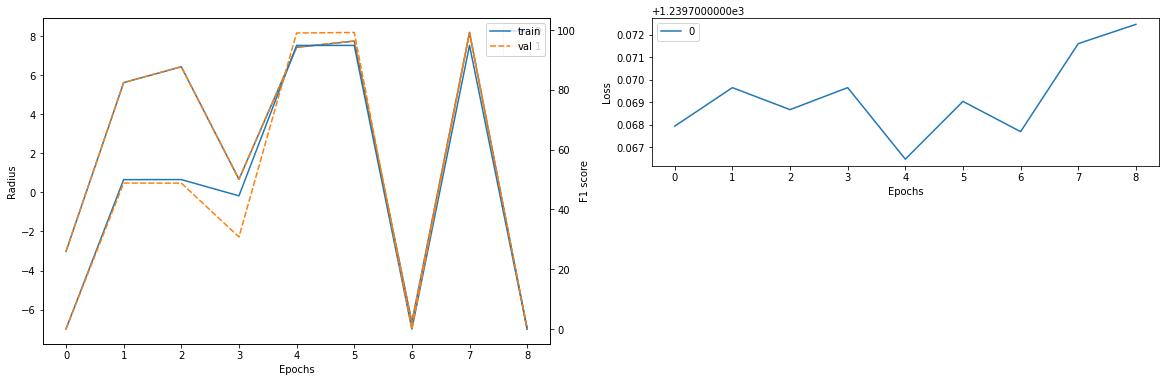

classification report for training:
[[3600    0    0]
 [   0 2931  669]
 [   0    0    0]]
90.71
f1_weighted: 0.9487827285254938, f1_macro: 0.6325218190169959, f1_micro: 0.9070833333333334, f_measure: {'Known': 94.8783, 'Open': 0, 'F1-score': 63.2522}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      0.81      0.90      3600
           5       0.00      0.00      0.00         0

    accuracy                           0.91      7200
   macro avg       0.67      0.60      0.63      7200
weighted avg       1.00      0.91      0.95      7200

classification report for test data:
[[417   0  28]
 [  0 448   0]
 [  0   0 163]]
97.35
f1_weighted: 0.9741028297843353, f1_macro: 0.9628071187314572, f1_micro: 0.9734848484848485, f_measure: {'Known': 98.3759, 'Open': 92.0904, 'F1-score': 96.2807}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       445
        

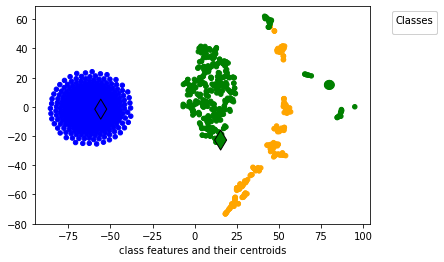

INFO:tensorflow:Assets written to: ram://d7aa7f9f-4fbf-4e12-9701-d2bcbeffbdc2/assets


In [36]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=4500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

ablation set to : 5000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, 4049 data in class 2 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
902 data in class 3 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    4000
1    4000
Name: 

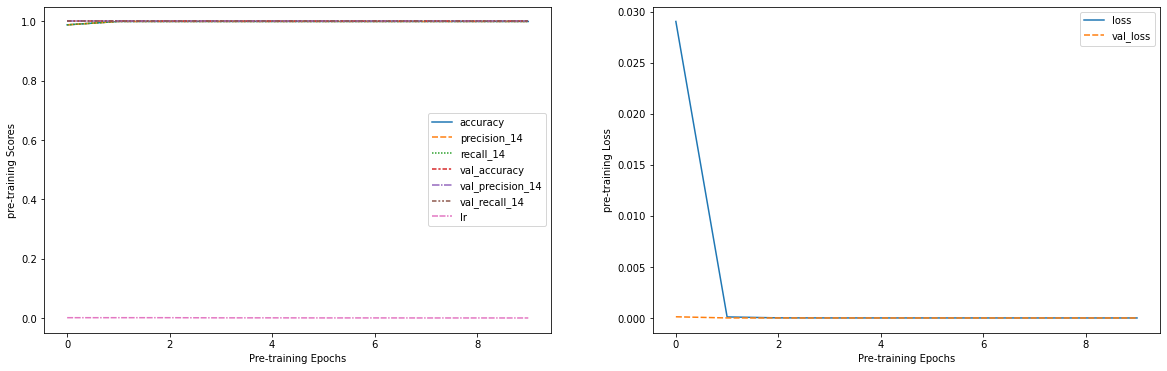

run_id:  2023-03-17_18_42_50.608561_6b4bd0f2c4c511ed8267ac8247733f47
features_n_centroid: (8002, 16)
tsne_features: (8000, 2)
tsne_centroids: (2, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


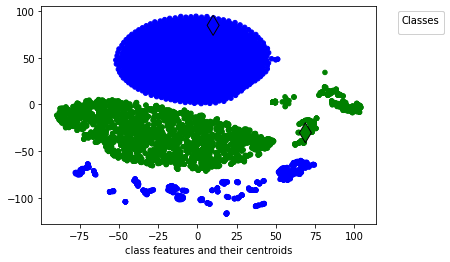

run_id:  2023-03-17_18_43_38.675217_87f234acc4c511ed8fa5ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.17it/s]


epoch: 1/9, train_loss: 2.562593698501587, F1_train: 0.9541098375738105 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.22it/s]


epoch: 2/9, train_loss: 2.562612295150757, F1_train: 0.9553376906318083 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  7.08it/s]


epoch: 3/9, train_loss: 2.5626020431518555, F1_train: 0.9556341861731082 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:36<00:00,  6.92it/s]


epoch: 4/9, train_loss: 2.562602996826172, F1_train: 0.9562262098966829 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  7.03it/s]


epoch: 5/9, train_loss: 2.562593936920166, F1_train: 0.9564478869411605 F1_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  6.95it/s]


epoch: 6/9, train_loss: 2.562592029571533, F1_train: 0.9564478869411605 F1_val: 1.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  7.04it/s]


epoch: 7/9, train_loss: 2.5625979900360107, F1_train: 0.9564478869411605 F1_val: 1.0
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:36<00:00,  6.89it/s]


epoch: 8/9, train_loss: 2.5626091957092285, F1_train: 0.9564478869411605 F1_val: 1.0
train score not improving  going to wait state 3
val score not improving  going to wait state 3


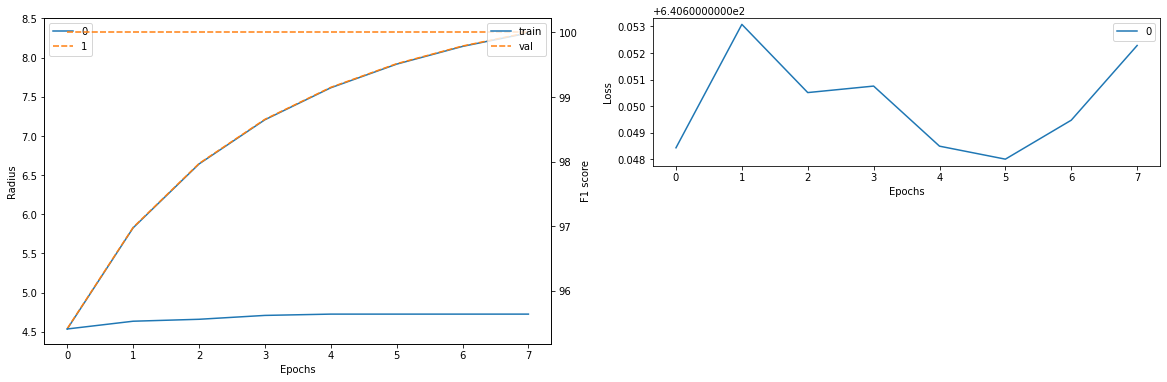

classification report for training:
[[4000    0    0]
 [   0 3359  641]
 [   0    0    0]]
91.99
f1_weighted: 0.9564478869411605, f1_macro: 0.6376319246274403, f1_micro: 0.9198750000000001, f_measure: {'Known': 95.6448, 'Open': 0, 'F1-score': 63.7632}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.84      0.91      4000
           5       0.00      0.00      0.00         0

    accuracy                           0.92      8000
   macro avg       0.67      0.61      0.64      8000
weighted avg       1.00      0.92      0.96      8000

classification report for test data:
[[495   0   0]
 [  0 493   0]
 [  0   0 164]]
100.0
f1_weighted: 1.0, f1_macro: 1.0, f1_micro: 1.0, f_measure: {'Known': 100.0, 'Open': 100.0, 'F1-score': 100.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       493
     

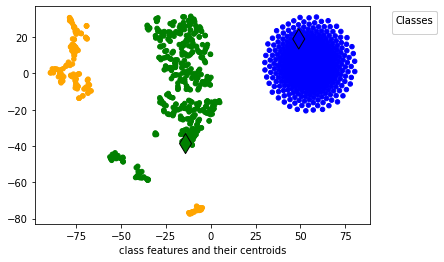

INFO:tensorflow:Assets written to: ram://0f75d603-323c-4aba-af14-f1ac945feaaf/assets


In [37]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=5000,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

In [17]:
# FP = add vertically ( col, the col sum is the actual. e.g. col-0 sum is actual for class-0 - 143 actual sample. Out of which one predicted as FP=Unknown class-5)
# TP = add horizontally ( rows  ,each row sum is the predictions)
#### class-0:  Precision: 142 / (142+1) = 0.99 , TP=142, FP = 1 ,  Recall: 142/142 = 1, FN = 0 ,   
#### class-1: Precission: 0/0
#### Class-2: Precision: 111/111, FP = 0 , Recall: 111/ (111 + 33) = 0.77 , FN = 33
#### class-5: Precission: 142/ (142+33+147+0) = 142/142+ 180 = 142/322=0.44,FP=180,  Recall: 142/(142+1) = 0.99, FN=1 

In [18]:
# For the "unknown detection without openset"  - this numbers are from the figure 5.4.1 of thesis report 
### class-0: Precision: 86/(86+106) = 86/192 = 0.4479 ~ 0.45 , Recall: 86/(86+77+89) = 86/86+168 = 86/252 = 0.34
### class-1: Precision: 114/(114+77) = 114/191 = 59.68~0.60 , FP =77, Recall = 114/(114+106+104) = 114/(114+210) = 114/324=0.35, FN = 210


perpexity : 13
features_n_centroid: (579, 12)
tsne_features: (576, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


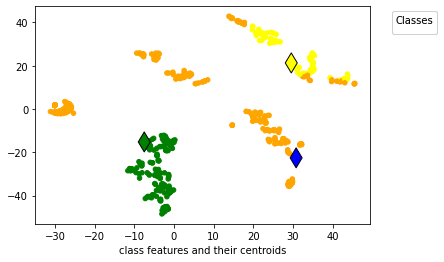

perpexity : 17
features_n_centroid: (579, 12)
tsne_features: (576, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


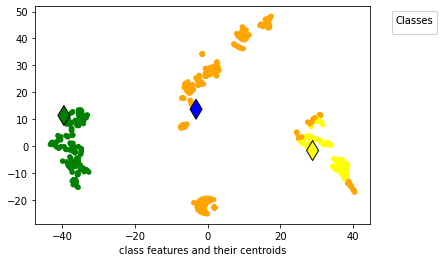

perpexity : 30
features_n_centroid: (579, 12)
tsne_features: (576, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


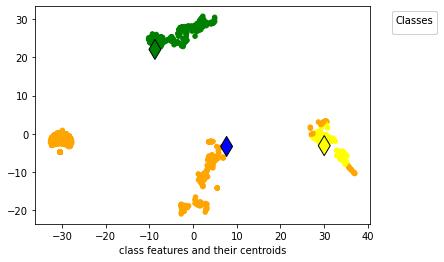

perpexity : 40
features_n_centroid: (579, 12)
tsne_features: (576, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


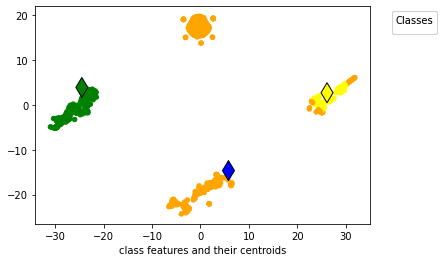

perpexity : 45
features_n_centroid: (579, 12)
tsne_features: (576, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


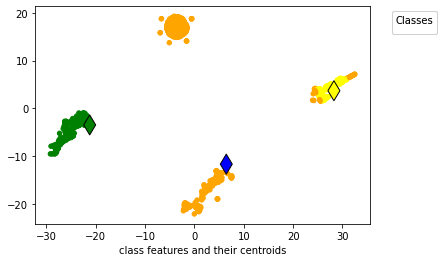

perpexity : 86
features_n_centroid: (579, 12)
tsne_features: (576, 2)
tsne_centroids: (3, 2)
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


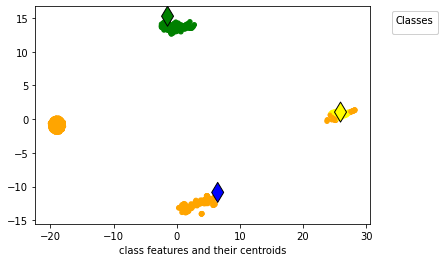

In [8]:
for i in (13, 17, 30, 40, 45, 86):
    print('perpexity :', i)    
    oset.plot_centroids(use_labels=oset.total_preds, centroid_black=False,
                        manual_color_map=True, tsne_perplexity=i)

In [20]:
oset.radius

<tf.Variable 'boundary_loss_1/Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[7.158868 ],
       [7.164533 ],
       [7.2192526]], dtype=float32)>